# Heart Stroke Prediction 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

Dataset Link:https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attributes:

1)id: unique identifier

2)gender: "Male", "Female" or "Other"

3)age: age of the patient

4)hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5)heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6)ever_married: "No" or "Yes"

7)work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8)Residence_type: "Rural" or "Urban"

9)avg_glucose_level: average glucose level in blood

10)bmi: body mass index

11)smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12)stroke: 1 if the patient had a stroke or 0 if not

## Data Cleaning

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file using pandas
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

#first five rows of dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#last five rows of dataset
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
#information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#volume of dataset
df.shape

(5110, 12)

## Dealing with Null values

In [6]:
#checking null values
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:xlabel='bmi'>

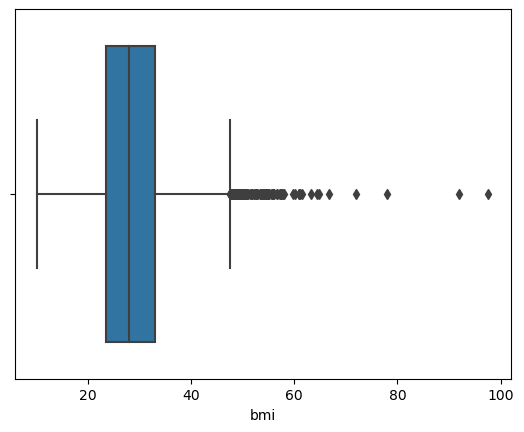

In [8]:
sns.boxplot(df['bmi'])

In [9]:
print(np.where(df['bmi']>45))

(array([  21,   66,   79,  113,  163,  190,  196,  254,  258,  270,  333,
        341,  358,  368,  415,  417,  430,  457,  462,  466,  493,  539,
        544,  595,  622,  637,  662,  672,  715,  761,  805,  834,  860,
        928, 1003, 1061, 1077, 1131, 1239, 1257, 1266, 1267, 1290, 1304,
       1322, 1456, 1501, 1529, 1532, 1559, 1564, 1575, 1584, 1595, 1641,
       1660, 1782, 1898, 1988, 2001, 2016, 2067, 2071, 2081, 2128, 2136,
       2232, 2265, 2277, 2282, 2284, 2290, 2309, 2330, 2393, 2411, 2441,
       2545, 2555, 2567, 2585, 2629, 2646, 2680, 2723, 2764, 2815, 2839,
       2840, 2883, 2893, 2896, 2991, 3024, 3060, 3218, 3238, 3243, 3305,
       3333, 3439, 3508, 3541, 3588, 3594, 3606, 3688, 3702, 3780, 3825,
       3867, 3909, 3920, 3931, 3959, 3980, 4035, 4071, 4126, 4154, 4176,
       4187, 4188, 4209, 4223, 4225, 4281, 4288, 4291, 4347, 4351, 4381,
       4405, 4407, 4456, 4475, 4533, 4571, 4588, 4636, 4650, 4691, 4704,
       4779, 4838, 4847, 4855, 4858, 4894, 4906, 4

<AxesSubplot:xlabel='stroke', ylabel='count'>

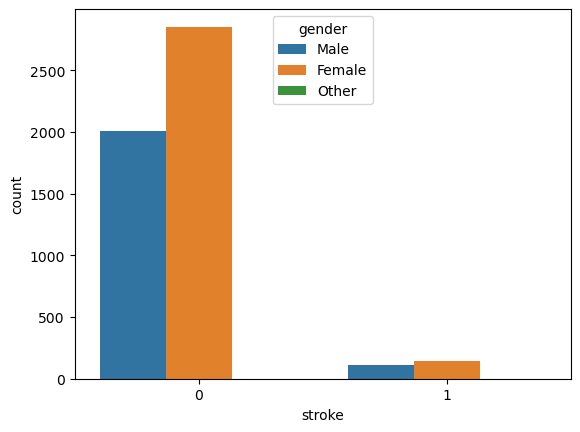

In [17]:
sns.countplot(data=df,x='stroke',hue='gender')

In [5]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
x = df['gender']
y = df['stroke']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)
x_train.head()

832     Female
3167    Female
1324    Female
1768    Female
4604      Male
Name: gender, dtype: object

In [ ]:
x_train_sm = sm.add_constant(x_train)